In [1]:
#Initial Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [2]:
#Load the Data
df = pd.read_csv('Datasets/NYC_Cab_Duration.csv')
print(df.shape)
df.head()

(583458, 10)


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id3879397,1,2016-06-02 17:46:16,1,-73.990105,40.732841,-73.973244,40.782879,N,2170
1,id0701659,1,2016-03-02 10:07:11,1,-73.975693,40.759712,-73.988235,40.753986,N,808
2,id3093367,2,2016-02-17 17:18:27,2,-73.781830,40.644772,-73.989960,40.747150,N,3787
3,id0727316,2,2016-03-17 07:30:59,1,-73.956200,40.778713,-73.976463,40.739731,N,679
4,id2137873,2,2016-04-20 17:15:26,6,-73.789513,40.646938,-73.951851,40.809151,N,2791


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583458 entries, 0 to 583457
Data columns (total 10 columns):
id                    583458 non-null object
vendor_id             583458 non-null int64
pickup_datetime       583458 non-null object
passenger_count       583458 non-null int64
pickup_longitude      583458 non-null float64
pickup_latitude       583458 non-null float64
dropoff_longitude     583458 non-null float64
dropoff_latitude      583458 non-null float64
store_and_fwd_flag    583458 non-null object
trip_duration         583458 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 44.5+ MB


In [4]:
#Absolute Minimum Preprocessing
df = df.fillna(value=0)

#Define the problem
y_feat = 'trip_duration'
x_feats = [feat for feat in df.columns if df[feat].dtype in [np.int64, np.float64] and feat != y_feat]
y = df[y_feat]
X = df[x_feats]

In [5]:
#Initial Models and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y)
models = [LinearRegression(), Lasso(), Ridge()]
names = ['OLS', 'Lasso', 'Ridge']
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('\n')

Model Stats for: OLS
Train R^2: 0.002728719125933754
Test R^2: 0.0008720857582689145
Training MSE: 18580436.921398807
Testing MSE: 95374850.14197356


Model Stats for: Lasso
Train R^2: 0.0025937248377881916
Test R^2: 0.0007400758524920282
Training MSE: 18582952.037299305
Testing MSE: 95387451.5564684


Model Stats for: Ridge
Train R^2: 0.002728714220580186
Test R^2: 0.0008714104780117582
Training MSE: 18580437.012791805
Testing MSE: 95374914.60294238




# Comment: 
Pretty darn poor results.

## Thoughts:

* vendor_id is misleading: its an integer but really a categorical variable. Use a dummy variable.
* We can engineer some potential useful features from our date field.
Start there and repeat.

In [6]:
df.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id3879397,1,2016-06-02 17:46:16,1,-73.990105,40.732841,-73.973244,40.782879,N,2170
1,id0701659,1,2016-03-02 10:07:11,1,-73.975693,40.759712,-73.988235,40.753986,N,808


In [6]:
df.vendor_id = df.vendor_id.astype(str) #For creating dummy variable

df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['Month'] = df.pickup_datetime.dt.month
df['Day_of_Month'] = df.pickup_datetime.dt.day
df['Day_of_Week'] = df.pickup_datetime.dt.dayofweek
df['Hour'] = df.pickup_datetime.dt.hour
df.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Month,Day_of_Month,Day_of_Week,Hour
0,id3879397,1,2016-06-02 17:46:16,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,6,2,3,17
1,id0701659,1,2016-03-02 10:07:11,1,-73.975693,40.759712,-73.988235,40.753986,N,808,3,2,2,10


In [7]:
#Define the problem
y_feat = 'trip_duration'
x_feats = [feat for feat in df.columns if df[feat].dtype in [np.int64, np.float64] and feat != y_feat]
x_feats += ['store_and_fwd_flag', 'vendor_id']


y = df[y_feat]
X = df[x_feats]
X = pd.get_dummies(X)
print(X.columns)
X.head()

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'Month', 'Day_of_Month',
       'Day_of_Week', 'Hour', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'vendor_id_1', 'vendor_id_2'],
      dtype='object')


,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Month,Day_of_Month,Day_of_Week,Hour,store_and_fwd_flag_N,store_and_fwd_flag_Y,vendor_id_1,vendor_id_2
0,1,-73.990105,40.732841,-73.973244,40.782879,6,2,3,17,1,0,1,0
1,1,-73.975693,40.759712,-73.988235,40.753986,3,2,2,10,1,0,1,0
2,2,-73.781830,40.644772,-73.989960,40.747150,2,17,2,17,1,0,0,1
3,1,-73.956200,40.778713,-73.976463,40.739731,3,17,3,7,1,0,0,1
4,6,-73.789513,40.646938,-73.951851,40.809151,4,20,2,17,1,0,0,1


In [9]:
#Second Models and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y)
models = [LinearRegression(), Lasso(), Ridge()]
names = ['OLS', 'Lasso', 'Ridge']
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('\n')

Model Stats for: OLS
Train R^2: 0.0055983689056889885
Test R^2: 0.0005717184453831736
Training MSE: 10212410.879349953
Testing MSE: 120472806.14316279


Model Stats for: Lasso
Train R^2: 0.005410203465597174
Test R^2: 0.0005277197895893204
Training MSE: 10214343.320656788
Testing MSE: 120478109.81690091


Model Stats for: Ridge
Train R^2: 0.005598357771601448
Test R^2: 0.0005713967590206259
Training MSE: 10212410.99369598
Testing MSE: 120472844.91979088




# Comments: 
Still not a perfect model by any means, but we have drastically improved results from a measly .08 R^2 value all the way to .65 R^2. Nice! Let's see if we can squeeze out some more performance!!m

In [10]:
df['Month'] = df.pickup_datetime.dt.month.astype(str)
df['Day_of_Month'] = df.pickup_datetime.dt.day.astype(str)
df['Day_of_Week'] = df.pickup_datetime.dt.dayofweek.astype(str)
df['Hour'] = df.pickup_datetime.dt.hour.astype(str)

y_feat = 'trip_duration'
x_feats = [feat for feat in df.columns if df[feat].dtype in [np.int64, np.float64] and feat != y_feat]
x_feats += ['store_and_fwd_flag', 'vendor_id', 'Month', 'Day_of_Month', 'Day_of_Week', 'Hour']


y = df[y_feat]
X = df[x_feats]
X = pd.get_dummies(X)
print(X.columns)

#Third Models and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y)
models = [LinearRegression(), Lasso(), Ridge()]
names = ['OLS', 'Lasso', 'Ridge']
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('\n')

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'vendor_id_1', 'vendor_id_2', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Day_of_Month_1',
       'Day_of_Month_10', 'Day_of_Month_11', 'Day_of_Month_12',
       'Day_of_Month_13', 'Day_of_Month_14', 'Day_of_Month_15',
       'Day_of_Month_16', 'Day_of_Month_17', 'Day_of_Month_18',
       'Day_of_Month_19', 'Day_of_Month_2', 'Day_of_Month_20',
       'Day_of_Month_21', 'Day_of_Month_22', 'Day_of_Month_23',
       'Day_of_Month_24', 'Day_of_Month_25', 'Day_of_Month_26',
       'Day_of_Month_27', 'Day_of_Month_28', 'Day_of_Month_29',
       'Day_of_Month_3', 'Day_of_Month_30', 'Day_of_Month_31',
       'Day_of_Month_4', 'Day_of_Month_5', 'Day_of_Month_6', 'Day_of_Month_7',
       'Day_of_Month_8', 'Day_of_Month_9', 'Day_of_Week_0', 'Day_of_Week_1',
       'Day_of_Week_2', 'Day_of_Week_3', 'Day

# Attempt Additional Feature Engineering

In [12]:
df['lat_diff'] = df.dropoff_latitude - df.pickup_latitude
df['long_diff'] = df.dropoff_longitude -  df.pickup_longitude
df['distance'] = np.sqrt(df.long_diff**2 + df.lat_diff**2)

In [13]:
df['Month'] = df.pickup_datetime.dt.month.astype(str)
df['Day_of_Month'] = df.pickup_datetime.dt.day.astype(str)
df['Day_of_Week'] = df.pickup_datetime.dt.dayofweek.astype(str)
df['Hour'] = df.pickup_datetime.dt.hour.astype(str)

y_feat = 'trip_duration'
x_feats = [feat for feat in df.columns if df[feat].dtype in [np.int64, np.float64] and feat != y_feat]
x_feats += ['store_and_fwd_flag', 'vendor_id']


y = df[y_feat]
X = df[x_feats]
X = pd.get_dummies(X)
print(X.columns)

#Third Models and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y)
models = [LinearRegression(), Lasso(), Ridge()]
names = ['OLS', 'Lasso', 'Ridge']
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('\n')

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'lat_diff', 'long_diff',
       'distance', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'vendor_id_1', 'vendor_id_2'],
      dtype='object')
Model Stats for: OLS
Train R^2: 0.006327447176187828
Test R^2: 0.021780654107550812
Training MSE: 46670808.46332928
Testing MSE: 10221016.360817285


Model Stats for: Lasso
Train R^2: 0.006291394628604174
Test R^2: 0.023368379869733166
Training MSE: 46672501.77923914
Testing MSE: 10204426.859638538


Model Stats for: Ridge
Train R^2: 0.006327575498418669
Test R^2: 0.021762802228029843
Training MSE: 46670802.436291255
Testing MSE: 10221202.887850737




## Exploratory Data Analysis

Generally its a good idea to start here, but let's take a step back.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

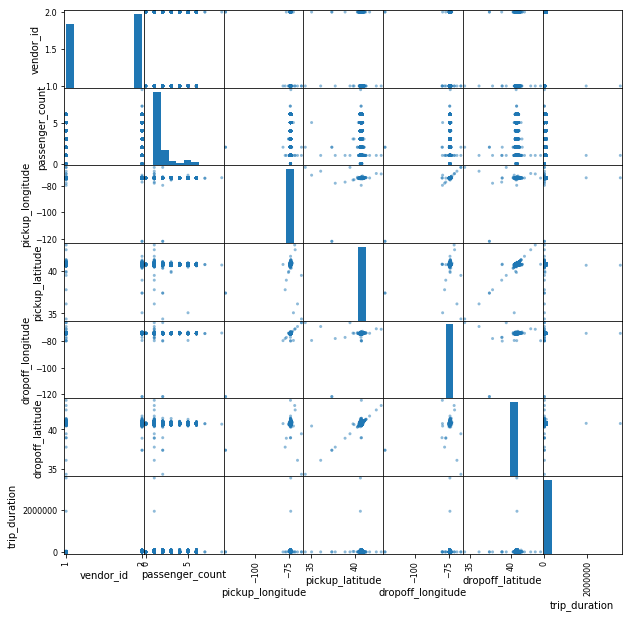

In [31]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

## Normalization

In [15]:
#Impact of Normalization
#Third Models and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y)
models = [LinearRegression(normalize=True), Lasso(normalize=True), Ridge(normalize=True)]
names = ['OLS', 'Lasso', 'Ridge']
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('\n')

Model Stats for: OLS
Train R^2: 0.005848352679132307
Test R^2: 0.027084825191420747
Training MSE: 46723701.471813686
Testing MSE: 10076366.440215506


Model Stats for: Lasso
Train R^2: 0.0
Test R^2: -3.5458859113379763e-06
Training MSE: 46998565.65920206
Testing MSE: 10356917.469032006


Model Stats for: Ridge
Train R^2: 0.004636596472155641
Test R^2: 0.019948147246569903
Training MSE: 46780652.27547023
Testing MSE: 10150280.162603758




In [16]:
#Using Cross Validation
def run_cross_validation_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format('LassoCV'))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('Model details:', model)
    print('Cross Validation Optimal Alpha Value for Regularization', model.alpha_)
    print('\n')    


for model in [LassoCV(), RidgeCV()]:
    run_cross_validation_model(model, X, y)

Model Stats for: LassoCV
Train R^2: 0.006925689944339841
Test R^2: 0.008469208026130381
Training MSE: 38211228.14738003
Testing MSE: 35615132.88417472
Model details: LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
Cross Validation Optimal Alpha Value for Regularization 2.4555388315721527


Model Stats for: LassoCV
Train R^2: 0.013861927248297934
Test R^2: 0.0037471304566311092
Training MSE: 18044243.759168927
Testing MSE: 96095917.54534397
Model details: RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)
Cross Validation Optimal Alpha Value for Regularization 0.1




# Polynomial Regression

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [17]:
def plot_polynomial_reg(model, X, y, degree_min=2, degree_max=7):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    degrees = []
    train_errs = []
    test_errs = []
    for degree in range(degree_min,degree_max+1):
        model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), model)
        #Could replace Ridge() above with a more complicated cross validation method to improve tuning
        #using a cross validation method will substantially increase runtime
        model.fit(X_train,y_train)
        #Get r^2 values for testing predictions and training predictions
        test_score = model.score(X_test,y_test)
        test_errs.append(test_score)
        
        train_score = model.score(X_train,y_train)
        train_errs.append(train_score)
        
        degrees.append(degree)
    #Create Plot
    plt.scatter(degrees, train_errs, label='Train R^2')
    plt.scatter(degrees, test_errs, label='Test R^2')
    plt.title('Train and Test Accuracy vs Model Complexity')
    plt.xlabel('Maximum Degree of Polynomial Regression')
    plt.legend()

for model in [Ridge(), Lasso()]:
    plot_polynomial_reg(Ridge(), X, y)

MemoryError: 

## LF
This is really bad!  Surely distance must be an indicator of trip_duration?!!!  Let's take a look:

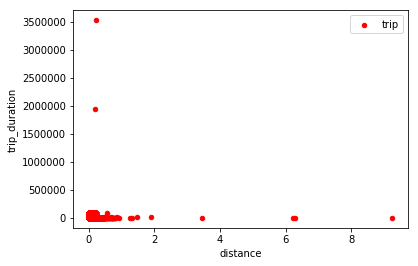

In [46]:
df.plot(x='distance',y='trip_duration', kind='scatter', color='red', label="trip")

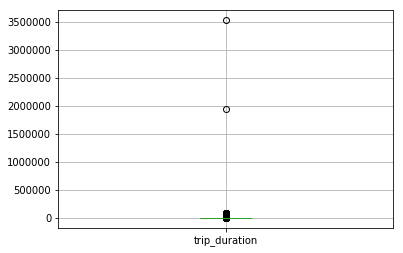

In [56]:
df.boxplot(column='trip_duration')

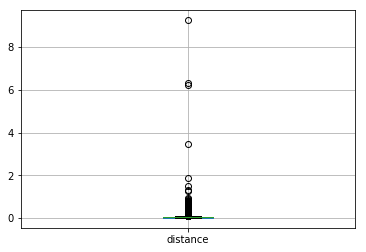

In [57]:
df.boxplot(column='distance')

Hmm.  Not what I was hoping for.  We seem to have really massive outliers for both trip_duration and distance.  Let's remove the trip_duration outliers:

In [20]:
df[df['trip_duration']<5000]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Month,Day_of_Month,Day_of_Week,Hour,lat_diff,long_diff,distance
0,id3879397,1,2016-06-02 17:46:16,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,6,2,3,17,0.050037,0.016861,0.052802
1,id0701659,1,2016-03-02 10:07:11,1,-73.975693,40.759712,-73.988235,40.753986,N,808,3,2,2,10,-0.005726,-0.012543,0.013788
2,id3093367,2,2016-02-17 17:18:27,2,-73.781830,40.644772,-73.989960,40.747150,N,3787,2,17,2,17,0.102379,-0.208130,0.231947
3,id0727316,2,2016-03-17 07:30:59,1,-73.956200,40.778713,-73.976463,40.739731,N,679,3,17,3,7,-0.038982,-0.020264,0.043935
4,id2137873,2,2016-04-20 17:15:26,6,-73.789513,40.646938,-73.951851,40.809151,N,2791,4,20,2,17,0.162212,-0.162338,0.229492
5,id0947345,1,2016-05-20 13:28:43,1,-73.988792,40.773994,-73.957748,40.778717,N,1103,5,20,4,13,0.004723,0.031044,0.031401
6,id1719734,2,2016-03-30 20:27:43,2,-73.974960,40.756119,-73.984230,40.742901,N,364,3,30,2,20,-0.013218,-0.009270,0.016144
7,id1766631,1,2016-01-11 00:12:45,1,-73.935867,40.795464,-73.944801,40.787407,N,235,1,11,0,0,-0.008057,-0.008934,0.012030
8,id3271163,1,2016-03-19 01:10:52,1,-74.001427,40.735867,-74.009666,40.719486,N,376,3,19,5,1,-0.016380,-0.008240,0.018336
9,id1365294,2,2016-04-08 08:58:58,1,-73.969261,40.763302,-73.870529,40.773663,N,1764,4,8,4,8,0.010361,0.098732,0.099274


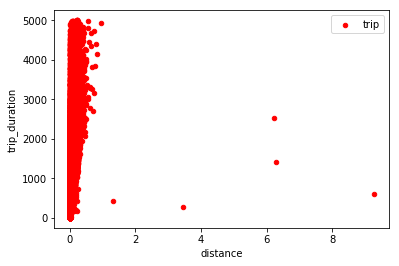

In [22]:
df[(df['trip_duration']<5000)].plot(x='distance',y='trip_duration', kind='scatter', color='red', label="trip")

Still outliers on the distance.  Would have thought that they would match the trip_duration outliers, but apparently not.  Suggests these might be erroneous.  Let's remove the distance outliers.

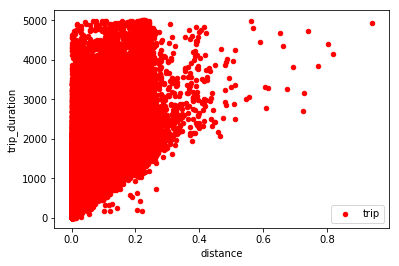

In [48]:
df[(df['trip_duration']<5000) & (df['distance']<1)].plot(x='distance',y='trip_duration', kind='scatter', color='red', label="trip")

That's better!  How many rows did we lose?

In [23]:
# Num rows
len(df) - len(df[(df['trip_duration']<5000) & (df['distance']<1)])

1539

In [24]:
# Percentage of rows
(len(df) - len(df[(df['trip_duration']<5000) & (df['distance']<1)])) / len(df[(df['trip_duration']<5000) & (df['distance']<1)])

0.0026446979734292917

In [25]:
# Recut the data, removing the outliers
y_feat = 'trip_duration'
x_feats = [feat for feat in df.columns if df[feat].dtype in [np.int64, np.float64] and feat != y_feat]
x_feats += ['store_and_fwd_flag', 'vendor_id']

df_dash = df[(df['trip_duration']<5000) & (df['distance']<1)]

y = df_dash[y_feat]
X = df_dash[x_feats]
X = pd.get_dummies(X)

In [26]:
# Run models again
X_train, X_test, y_train, y_test = train_test_split(X, y)
models = [LinearRegression(normalize=True), Lasso(normalize=True), Ridge(normalize=True)]
names = ['OLS', 'Lasso', 'Ridge']
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('\n')

Model Stats for: OLS
Train R^2: 0.5856648845913403
Test R^2: 0.582636596434801
Training MSE: 167804.82371090233
Testing MSE: 167649.0147189476


Model Stats for: Lasso
Train R^2: 0.0
Test R^2: -2.039488484406604e-05
Training MSE: 404997.8326007826
Testing MSE: 401694.141051126


Model Stats for: Ridge
Train R^2: 0.4483741146920377
Test R^2: 0.4476589368704115
Training MSE: 223407.28795621265
Testing MSE: 221867.64395605674




Much better. R2 is 0.58 now.

In [27]:
#Using Cross Validation
def run_cross_validation_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format('LassoCV'))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('Model details:', model)
    print('Cross Validation Optimal Alpha Value for Regularization', model.alpha_)
    print('\n')    


for model in [LassoCV(), RidgeCV()]:
    run_cross_validation_model(model, X, y)

Model Stats for: LassoCV
Train R^2: 0.5925135281961422
Test R^2: 0.5947246313101806
Training MSE: 164621.7819290903
Testing MSE: 164017.3124295674
Model details: LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
Cross Validation Optimal Alpha Value for Regularization 0.02052034863905374


Model Stats for: LassoCV
Train R^2: 0.5926437622602061
Test R^2: 0.5943508281929453
Training MSE: 164730.0664002488
Testing MSE: 163687.6632223094
Model details: RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)
Cross Validation Optimal Alpha Value for Regularization 1.0




# Final Pipeline

Choose current best model.

In [32]:
#Using Cross Validation
def run_model(model, X, y):
    #X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format('LassoCV'))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('Model details:', model)
    print('\n')    


model =Lasso(alpha=0.02052034863905374)
run_model(model, X, y)

Model Stats for: LassoCV
Train R^2: 0.5937124618805694
Test R^2: 0.5908630463929666
Training MSE: 164545.57235107725
Testing MSE: 164344.56536296627
Model details: Lasso(alpha=0.02052034863905374, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)




In [ ]:
yhatnew = model.predict(xnew)